# Proyecto 2
## David Henao Molina - Maria Camila Bravo

In [902]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.signal as signal 
from scipy.fftpack import fft
from scipy.signal import detrend
from scipy.fftpack import fft
from numpy.polynomial.polynomial import Polynomial
from scipy import stats


### Extracción de los datos


In [859]:
ruta_base = os.getcwd()
ruta_base

'/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Biosenales_20242'

In [860]:
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\Diagnostics.xlsx"
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/Diagnostics.xlsx"
dataframe = pd.read_excel(ruta)
dataframe

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180111_165520_97000,SA,NONE,20,FEMALE,67,67,82,382,403,88,20,11,224,265,415
3,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
4,MUSE_20180112_122850_57000,AF,STDD STTC,73,FEMALE,162,162,114,252,413,68,-40,26,228,285,354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10641,MUSE_20181222_204306_99000,SVT,NONE,80,FEMALE,196,73,168,284,513,258,244,32,177,261,319
10642,MUSE_20181222_204309_22000,SVT,NONE,81,FEMALE,162,81,162,294,482,110,-75,27,173,254,320
10643,MUSE_20181222_204310_31000,SVT,NONE,39,MALE,152,92,152,340,540,250,38,25,208,284,378
10644,MUSE_20181222_204312_58000,SVT,NONE,76,MALE,175,178,128,310,529,98,-83,29,205,269,360


#### Creamos el nuevo dataframe que va a contener solo los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation)

In [861]:
df_filtrado= dataframe[(dataframe['Rhythm'] == 'SB') | (dataframe['Rhythm'] == 'AFIB')]
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado

,FileName,Rhythm,Beat,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,MUSE_20180113_171327_27000,AFIB,RBBB TWC,85,MALE,117,234,114,356,496,81,-27,19,208,265,386
1,MUSE_20180112_073319_29000,SB,TWC,59,FEMALE,52,52,92,432,401,76,42,8,215,261,431
2,MUSE_20180113_121940_44000,SB,NONE,66,MALE,53,53,96,456,427,34,3,9,219,267,447
3,MUSE_20180112_120347_79000,SB,NONE,46,FEMALE,57,57,70,404,393,38,24,9,225,260,427
4,MUSE_20180114_075026_69000,AFIB,TWC,80,FEMALE,98,86,74,360,459,69,83,17,215,252,395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,LVHV,56,FEMALE,56,56,88,444,428,49,62,9,219,263,441
5665,MUSE_20180113_122544_20000,SB,NONE,38,FEMALE,56,56,88,434,418,69,54,10,218,262,435
5666,MUSE_20180114_074720_85000,SB,NONE,55,FEMALE,57,57,94,414,402,-4,1,10,212,259,419
5667,MUSE_20180115_131524_93000,AFIB,RBBB TWC,70,MALE,93,82,130,386,479,61,194,15,225,290,418


In [862]:
fs = 500 # frecuencia de muestre mencionada 
t = np.arange(0, df_filtrado.shape[0]/fs,1/fs) 
t.shape

(5669,)

#### Extracción de las señales de ECG de la derivación II

In [863]:
#datos = pd.read_csv('c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised\\MUSE_20180112_073319_29000.csv',delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
ruta = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised/MUSE_20180111_155115_19000.csv'
datos = pd.read_csv(ruta, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datos_interes = datos['II']
datos


,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,-165.33,-358.970,-121.710,270.250,-28.869,-231.16,448.39,636.52,618.45,-7.8987,-315.160,-570.84
1,-150.75,-336.810,-114.980,251.410,-23.883,-217.52,441.74,646.47,642.56,35.3890,-269.510,-532.21
2,-136.69,-315.560,-108.630,233.450,-19.126,-204.36,436.06,656.31,665.95,76.5720,-225.830,-495.39
3,-123.74,-296.230,-103.090,217.230,-14.815,-192.29,432.27,666.14,688.05,113.5100,-186.000,-461.84
4,-112.57,-279.750,-98.611,203.530,-11.213,-181.87,431.08,676.31,708.47,144.3000,-151.680,-432.56
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-190.32,52.396,170.760,74.543,-170.890,107.63,310.73,398.59,538.11,230.9700,87.684,-249.88
4996,-178.98,65.438,171.870,62.325,-165.650,114.41,302.32,398.80,541.18,245.2700,110.940,-226.42
4997,-171.04,74.181,172.080,53.876,-161.490,118.93,297.25,401.02,544.16,254.4800,129.340,-207.20
4998,-165.46,79.570,171.300,48.203,-157.840,121.64,293.97,403.86,546.18,259.5100,144.140,-190.64


In [864]:
folder_path = '/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Proyecto 2/ECGDataDenoised'
#folder_path = r'c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Proyecto2\\ECGDataDenoised'

# Diccionario para almacenar los datos de la derivación II por cada paciente
ecg_dict = {}

# Iterar sobre el FileName del dataframe filtrado
for filename in df_filtrado['FileName']:
    file_path = os.path.join(folder_path, filename + '.csv')
    
    if os.path.exists(file_path):
        datos = pd.read_csv(file_path, delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
        derivacion_II = datos['II'].values # Cargamos solo la derivación II y lo llevamos a arreglos
        ecg_dict[filename] = derivacion_II
    else:
        print(f"El archivo {filename}.csv no se encontró.")
print('Datos almacenados en dicionario ecg_dict de derivacion II')

ecg_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in ecg_dict.items()]))

Datos almacenados en dicionario ecg_dict de derivacion II


# Formula 1 - Detrend Polinomico

##### La primera fórmula se centra en cuantificar la desviación entre la señal original de ECG y la señal después de haber sido eliminada su tendencia (detrended). En este contexto, la desviación, denotada como δ(n), se define como el promedio de las diferencias al cuadrado entre las amplitudes de la señal original x(0) y la señal sin tendencia x(n), a lo largo de todos los puntos de la señal (k).


In [865]:
def detrend(x, n):
    k = len(x)
    t = np.arange(k)
    poly_coeffs = np.polyfit(t, x, n)
    trend = np.polyval(poly_coeffs, t)
    xn = x - trend
    return xn


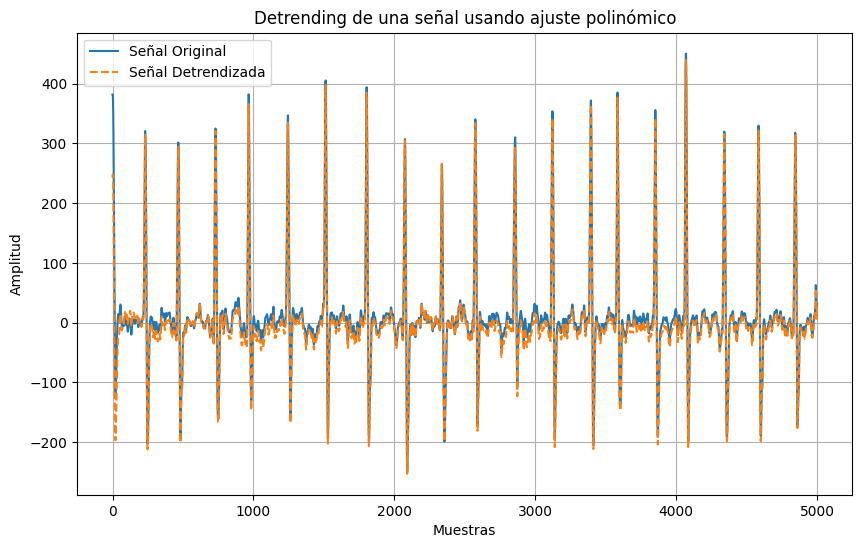

In [866]:
x = ecg_dict['MUSE_20180113_171327_27000']
n = 15# Elegir un grado para el polinomio

# Aplicar el detrend
xn = detrend(x, n)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.plot(x, label='Señal Original')
#plt.plot(trend, label=f'Tendencia (grado {n})', linestyle='--')
plt.plot(xn, label='Señal Detrendizada', linestyle='--')
plt.legend()
plt.title('Detrending de una señal usando ajuste polinómico')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

#  Formula  2 Compresión 

#### La fórmula es un proceso de normalización de la señal de ECG. La idea es ajustar todos los valores de la serie temporal de ECG, x(tk), a un rango entre 0 y 1, utilizando los valores máximo (xmax) y mínimo (xmin) de esa señal. Este ajuste se realiza para facilitar la comparación entre diferentes conjuntos de datos sin que se vean influenciados por la escala original de las señales.

In [867]:
def compression(c, Xmin, Xmax):
  return (c - Xmin) / (Xmax - Xmin)


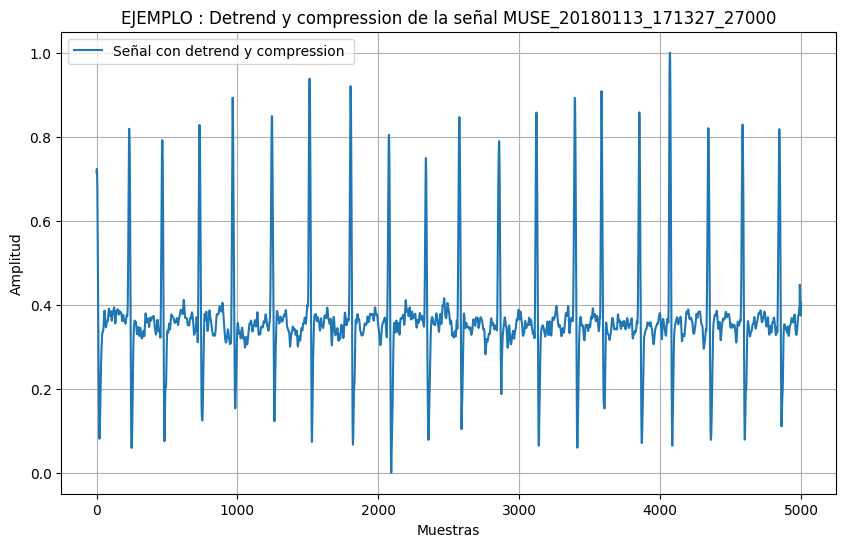

In [868]:
# definir los valores mínimos y máximos
Xmin = np.min(xn)
Xmax = np.max(xn)

s = compression(xn,Xmin,Xmax)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.legend()
plt.title('EJEMPLO : Detrend y compression de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

La señal comprimida tiene un offset, hay que aplicar nuevamete el drtrend

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/1041325771.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(t, x, n)


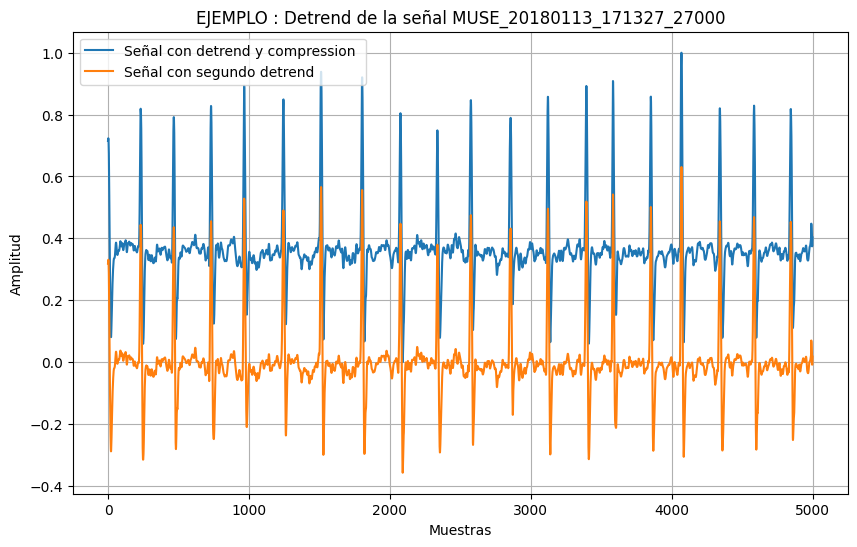

In [869]:
x_nuevo = detrend(s,20)
plt.figure(figsize=(10, 6))
plt.plot(s, label='Señal con detrend y compression ')
plt.plot(x_nuevo, label='Señal con segundo detrend')
plt.legend()
plt.title('EJEMPLO : Detrend de la señal MUSE_20180113_171327_27000')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Formula 3 y 4  Biespectro: Analisis Expectral de Potencia y Bicoherencia

#### Se calcula a través de la Transformada Rápida de Fourier (FFT), el espectro de potencia de los datos se obtiene revelando que la mayor parte de la potencia se concentra en un rango de frecuencias, esta formula se utiliza para medir la relación entre pares de frecuencias en una señal y evaluar cómo estas frecuencias interactúan entre sí.

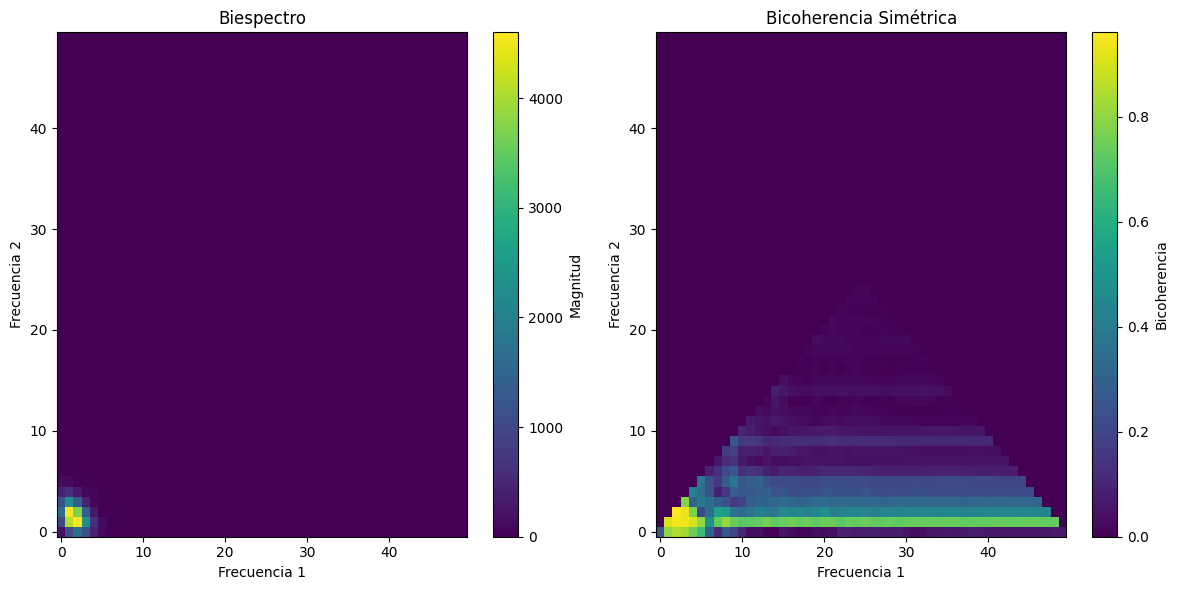

In [876]:
def calc_bis_bic(signal, N, fs):
    # Segmentación de la señal
    N_seg = []
    id = range(0, len(signal) - N + 1, N)
    
    for i in id:
        seg = signal[i:i + N]
        N_seg.append(seg)
        
    arreglo = np.array(N_seg)
    numero_seg = arreglo.shape[0]
    
    # Calcular la FFT de los segmentos
    fft_seg = np.fft.fft(arreglo, n=N, axis=1)
    fft_seg = fft_seg[:, :N // 2]  # Tomar solo la mitad positiva

    # Inicializar las matrices para almacenar el biespectro y la bicoherencia
    bispectrum = np.zeros((N // 2, N // 2), dtype=complex)
    den_bic = np.zeros((N // 2, N // 2), dtype=float)
    
    # Umbral de significancia
    significance_threshold = np.sqrt(9.2 / (2 * N))

    # Calcular el biespectro y la bicoherencia
    for j in range(numero_seg):
        sig = fft_seg[j, :]
        
        for f1 in range(N // 2):
            for f2 in range(N // 2):
                fsum = f1 + f2
                if fsum < N // 2:
                    S_f1 = sig[f1]
                    S_f2 = sig[f2]
                    S_fsum = sig[fsum]
                    
                    # Calcular el biespectro
                    bispectrum[f1, f2] += S_f1 * S_f2 * np.conj(S_fsum)
                    
                    # Calcular el denominador para la bicoherencia
                    den_bic[f1, f2] += np.abs(S_f1) * np.abs(S_f2) * np.abs(S_fsum)
    
    # Calcular la bicoherencia
    bicoh = np.abs(bispectrum) / (den_bic + np.finfo(float).eps)

    # Filtrar la bicoherencia por el umbral de significancia
    significant_bicoherence = bicoh[bicoh > significance_threshold]

    # Sumar todos los valores significativos
    sFSB = np.sum(significant_bicoherence)

    # Aplicar simetría a la bicoherencia
    size = bicoh.shape[0]
    sim_bicoherence = np.zeros((size, size))
    for f1 in range(size):
        for f2 in range(f1, size):
            sim_bicoherence[f1, f2] = bicoh[f1, f2]
    
    return bispectrum, sim_bicoherence, sFSB

# Ejemplo de uso

bispectrum, sim_bicoherence, sFSB = calc_bis_bic(señal_ejemplo, 100, 500)

# Ploteo del biespectro
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Biespectro')
plt.imshow(np.abs(bispectrum), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Magnitud')
plt.xlabel('Frecuencia 1')
plt.ylabel('Frecuencia 2')

# Ploteo de la bicoherencia simétrica
plt.subplot(1, 2, 2)
plt.title('Bicoherencia Simétrica')
plt.imshow(sim_bicoherence, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Bicoherencia')
plt.xlabel('Frecuencia 1')
plt.ylabel('Frecuencia 2')

plt.tight_layout()
plt.show()



# 4. EXTRACCION DE FRECUENCIA QUE CONTIENE MAXIMA POTENCIA 

9.0


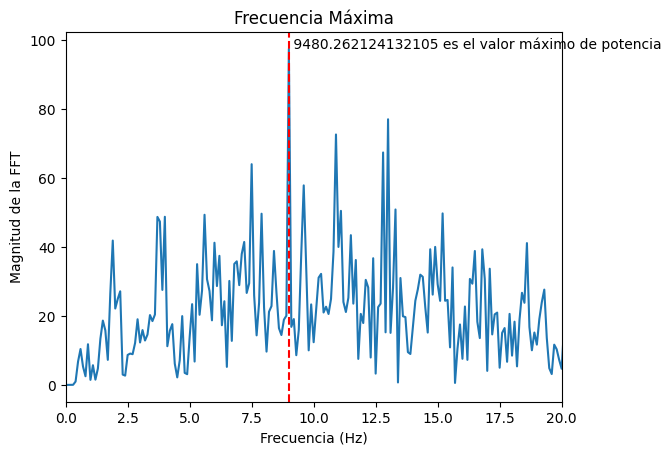

In [871]:
def MAX_Pot(signal, grafico: bool = True):
    FT = np.fft.fft(signal)
    FT = np.abs(FT[:len(FT)//2])  # Magnitud de la FFT
    freqs = np.fft.fftfreq(len(signal), 1/500)
    freqs = freqs[:len(freqs)//2]
    power = np.abs(FT)**2  # Potencia
    maxV = np.argmax(power)  # Índice de la frecuencia con mayor potencia
    maxFf = round(freqs[maxV], 5)  # Frecuencia correspondiente
    max = power[maxV]  # Valor de potencia máxima
    maxF = FT[maxV]  # Valor de magnitud en la FFT para la frecuencia máxima
    
    if grafico:
        plt.figure()
        plt.plot(freqs, FT)
        plt.xlim([0, 20])
        plt.axvline(maxFf, color='r', linestyle='--', label='Frecuencia Máxima')
        plt.text(maxFf, maxF, f' {power[maxV]} es el valor máximo de potencia')
        plt.title('Frecuencia Máxima')
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Magnitud de la FFT')
    
    return  maxFf

# Ejemplo de señal corregida
señal_ejemplo = detrend(compression(detrend(x, 15), np.min(x), np.max(x)), 15)
resultado = MAX_Pot(señal_ejemplo)

print(resultado)


# 5. Para la señal sumar el número de frecuencias que son significativas para bicoherencia 


Se obtuvo la suma en el punto anterior 

# 6. Rutina

In [874]:
def process_signals(ecg_dict):
    processed_signals = []  # Lista para almacenar las señales procesadas

    for registro, signal in ecg_dict.items():
        # Primer detrend
        detrended_signal = detrend(signal, n=15)

        # Cálculo de Xmin y Xmax
        Xmin = np.min(detrended_signal)
        Xmax = np.max(detrended_signal)

        # Compresión
        compressed_signal = compression(detrended_signal, Xmin, Xmax)

        # Segundo detrend
        processed_signal = detrend(compressed_signal, n=15)

        # Agregar la señal procesada a la lista
        processed_signals.append(processed_signal)

    return processed_signals
processed_signals = process_signals(ecg_dict)


In [877]:
def process_and_calc_sfsb(processed_signals, n_segments=100, sample_rate=500):
    sfsb_values = []  # Lista para almacenar los valores de sFSB

    # Recorrer la lista de señales procesadas
    for processed_signal in processed_signals:
        # Aplicar la función calc_bis_bic para obtener el sFSB
        _, _, sFSB = calc_bis_bic(processed_signal, n_segments, sample_rate)
        
        # Agregar el valor de sFSB a la lista
        sfsb_values.append(sFSB)
    
    return sfsb_values

sfsb_values = process_and_calc_sfsb(processed_signals)

In [879]:
def process_and_calc_fmp(processed_signals):
    fmp_values = []  # Lista para almacenar los valores de fMP

    # Recorrer la lista de señales procesadas
    for processed_signal in processed_signals:
        # Aplicar la función MAX_Pot para obtener la frecuencia de máxima potencia
        fmp_result = MAX_Pot(processed_signal, grafico=False)
        
        # Extraer el valor de 'Máxima frecuencia' y agregarlo a la lista
        fmp_values.append(fmp_result)
    
    return fmp_values

fmp_values = process_and_calc_fmp(processed_signals)

In [884]:
registros = df_filtrado['FileName'].tolist()  # Suponiendo que df_filtrado tiene esta columna
estados = df_filtrado['Rhythm'].tolist()  # Suponiendo que df_filtrado tiene esta columna

# Verificar que todas las listas tienen el mismo tamaño
if len(registros) == len(estados) == len(sfsb_values) == len(fmp_values):
    
    # Crear el DataFrame con las listas procesadas
    data_dict = {
        'Registro': registros,
        'Estado': estados,
        'fMP': fmp_values,
        'sFSB': sfsb_values
        }
    
    # Convertir el diccionario en DataFrame
    Data_rutina = pd.DataFrame(data_dict)

    # Mostrar el DataFrame resultante
Data_rutina


,Registro,Estado,fMP,sFSB
0,MUSE_20180113_171327_27000,AFIB,9.0,177.098752
1,MUSE_20180112_073319_29000,SB,2.6,626.195293
2,MUSE_20180113_121940_44000,SB,2.7,310.394371
3,MUSE_20180112_120347_79000,SB,3.8,347.447345
4,MUSE_20180114_075026_69000,AFIB,4.2,347.588662
...,...,...,...,...
5664,MUSE_20180114_134724_10000,SB,2.8,384.929319
5665,MUSE_20180113_122544_20000,SB,0.9,414.447110
5666,MUSE_20180114_074720_85000,SB,15.3,478.893668
5667,MUSE_20180115_131524_93000,AFIB,2.6,421.276681


# 7.Rutinas Punto 2

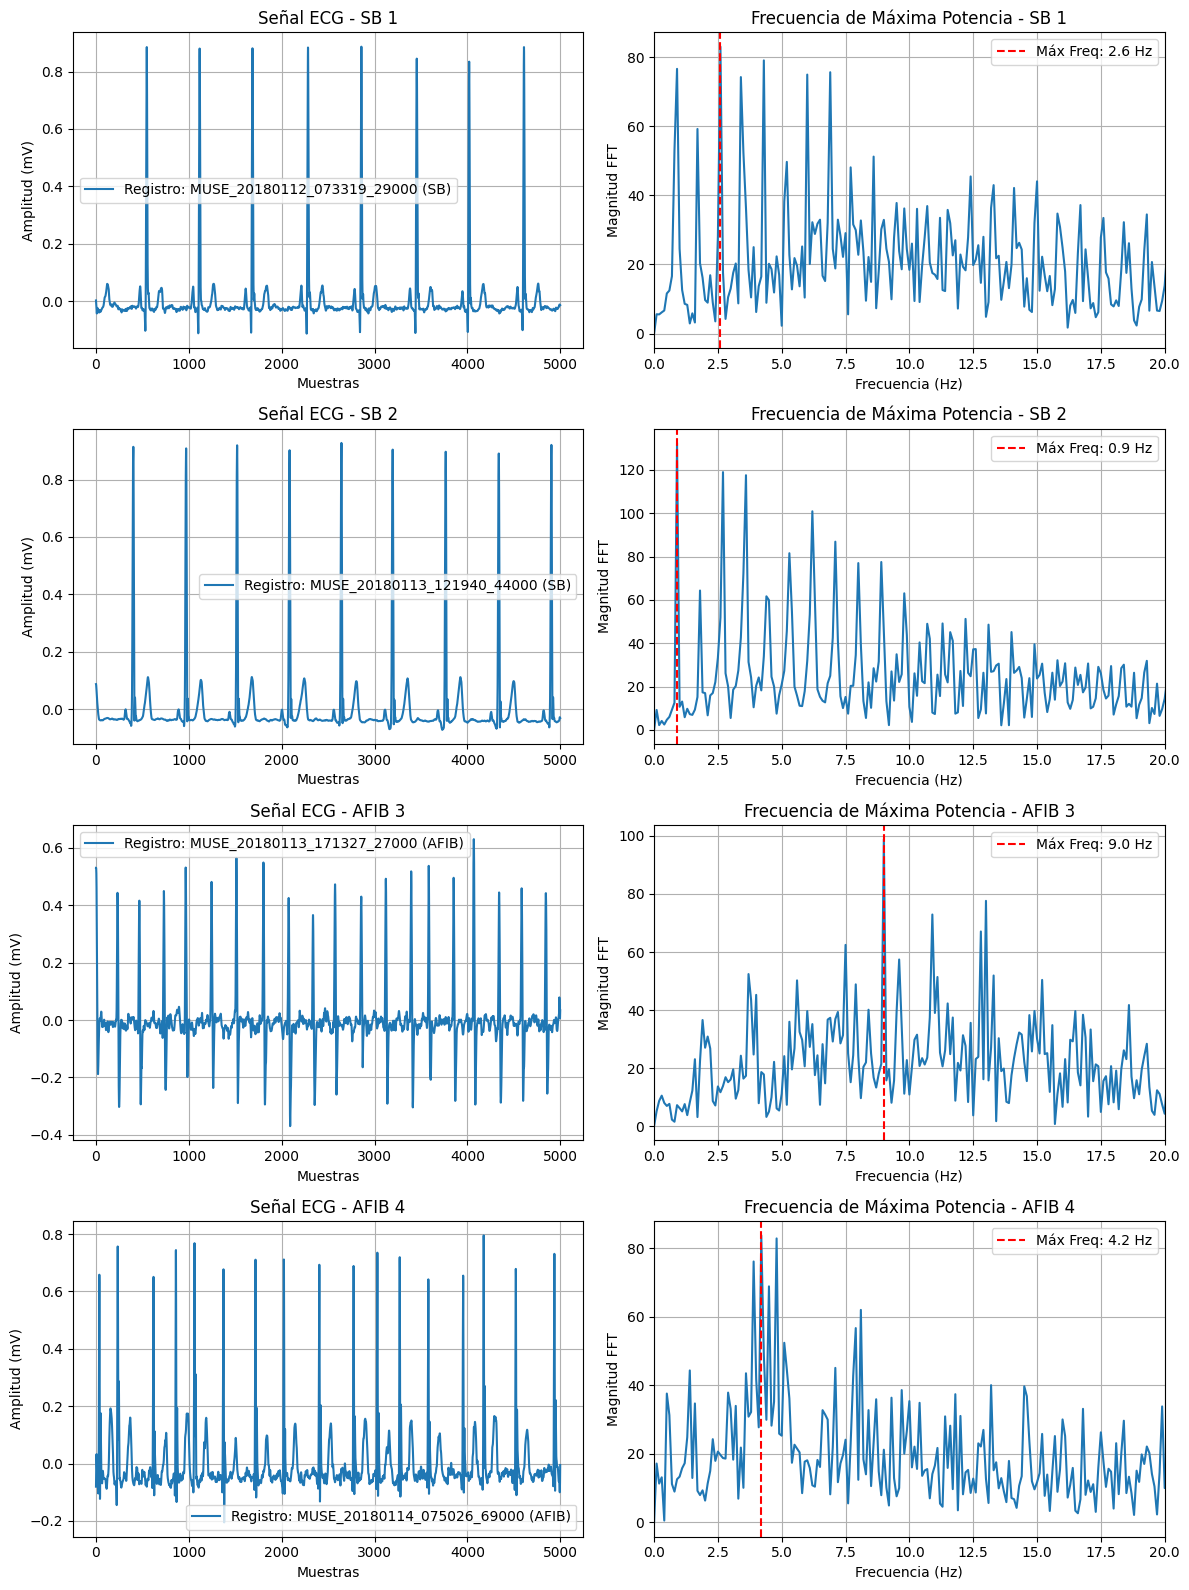

In [889]:
# Función para aplicar detrend y compresión a una señal
def process_signal(signal):
    # Aplicar detrending a la señal
    detrended_signal = detrend(signal)  
    
    # Calcular Xmin y Xmax para la compresión
    Xmin = np.min(detrended_signal)
    Xmax = np.max(detrended_signal)
    
    # Aplicar compresión
    compressed_signal = compression(detrended_signal, Xmin, Xmax)
    
    # Aplicar detrending de nuevo si es necesario
    detrended_signal2 = detrend(compressed_signal)  
    
    return detrended_signal2

# Función para graficar señales y sus respectivas frecuencias de máxima potencia
def plot_comparison(df_filtrado_seleccion):
    num_records = len(df_filtrado_seleccion)
    fig, axes = plt.subplots(num_records, 2, figsize=(12, 4 * num_records))

    # Iterar por cada señal (2 SB y 2 AFIB)
    for i, (index, row) in enumerate(df_filtrado_seleccion.iterrows()):
        registro = row['Registro']
        estado = row['Estado']
        
        # Verificar si el registro está en ecg_dict
        if registro in ecg_dict:
            signal = ecg_dict[registro]  # Obtener la señal del diccionario
            
            # Procesar la señal aplicando detrend y compresión
            processed_signal = process_signal(signal)
            
            # Graficar la señal procesada
            axes[i, 0].plot(processed_signal, label=f'Registro: {registro} ({estado})')
            axes[i, 0].set_title(f'Señal ECG - {estado} {i + 1}')
            axes[i, 0].set_xlabel('Muestras')
            axes[i, 0].set_ylabel('Amplitud (mV)')
            axes[i, 0].legend()
            axes[i, 0].grid(True)
            
            # Calcular la frecuencia de máxima potencia
            fMP = MAX_Pot(processed_signal,grafico=False)
            
            # Graficar la FFT y la frecuencia de máxima potencia
            freqs = np.fft.fftfreq(len(processed_signal), 1/500)[:len(processed_signal)//2]
            FT = np.abs(np.fft.fft(processed_signal))[:len(processed_signal)//2]
            axes[i, 1].plot(freqs, FT)
            axes[i, 1].axvline(fMP, color='r', linestyle='--', label=f'Máx Freq: {fMP} Hz')
            axes[i, 1].set_xlim([0, 20])
            axes[i, 1].set_title(f'Frecuencia de Máxima Potencia - {estado} {i + 1}')
            axes[i, 1].set_xlabel('Frecuencia (Hz)')
            axes[i, 1].set_ylabel('Magnitud FFT')
            axes[i, 1].legend()
            axes[i, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Filtrar el DataFrame por SB y AFIB, seleccionando 2 registros de cada uno
df_SB = Data_rutina[Data_rutina['Estado'] == 'SB'].head(2)
df_AFIB = Data_rutina[Data_rutina['Estado'] == 'AFIB'].head(2)

# Concatenar ambos DataFrames filtrados
df_filtrado_seleccion = pd.concat([df_SB, df_AFIB])

# Llamar a la función para graficar la comparación
plot_comparison(df_filtrado_seleccion)




# 8.Indicar si hay o no diferencias estadísticas entre las características espectrales del punto 4 y 5 para las dos poblaciones de estudio

In [896]:
# Función para calcular la máxima potencia
def MAX_Pot(signal, grafico: bool = True):
    FT = np.fft.fft(signal)
    FT = np.abs(FT[:len(FT)//2])  # Magnitud de la FFT
    freqs = np.fft.fftfreq(len(signal), 1/500)
    freqs = freqs[:len(freqs)//2]
    power = np.abs(FT)**2  # Potencia
    maxV = np.argmax(power)  # Índice de la frecuencia con mayor potencia
    maxFf = round(freqs[maxV], 5)  # Frecuencia correspondiente
    max_power = power[maxV]  # Valor de potencia máxima
    maxF = FT[maxV]  # Valor de magnitud en la FFT para la frecuencia máxima
    
    if grafico:
        plt.figure()
        plt.plot(freqs, FT)
        plt.xlim([0, 20])
        plt.axvline(maxFf, color='r', linestyle='--', label='Frecuencia Máxima')
        plt.text(maxFf, maxF, f' {max_power} es el valor máximo de potencia')
        plt.title('Frecuencia Máxima')
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Magnitud de la FFT')
    
    return maxFf  # Devolver la frecuencia máxima de potencia

# Función para calcular la máxima potencia (ajustada)
def calculate_max_pot(signal):
    return MAX_Pot(signal, grafico=False)  # Llama a MAX_Pot y devuelve la frecuencia máxima

# Llamar a la función para realizar las pruebas de normalidad y homocedasticidad
test_normality_and_homogeneity(df_filtrado_seleccion)


Registro 1 - SB: Estadístico = 0.2965, p-valor = 0.0000
Se rechaza la hipótesis nula: la señal no sigue una distribución normal.
Registro 2 - SB: Estadístico = 0.3401, p-valor = 0.0000
Se rechaza la hipótesis nula: la señal no sigue una distribución normal.
Registro 3 - AFIB: Estadístico = 0.6271, p-valor = 0.0000
Se rechaza la hipótesis nula: la señal no sigue una distribución normal.
Registro 4 - AFIB: Estadístico = 0.5732, p-valor = 0.0000
Se rechaza la hipótesis nula: la señal no sigue una distribución normal.

Prueba de Homocedasticidad: Estadístico = 47.7422, p-valor = 0.0000
Se rechaza la hipótesis nula: las varianzas no son homogéneas.


In [897]:
# Estadísticas descriptivas Cada Data frame 
print("Estadísticas para SB:")
print(sb_stats)

print("\nEstadísticas para AFIB:")
print(afib_stats)

Estadísticas para SB:
count    2.000000
mean     1.750000
std      1.202082
min      0.900000
25%      1.325000
50%      1.750000
75%      2.175000
max      2.600000
Name: fMP, dtype: float64

Estadísticas para AFIB:
count    2.000000
mean     6.600000
std      3.394113
min      4.200000
25%      5.400000
50%      6.600000
75%      7.800000
max      9.000000
Name: fMP, dtype: float64


-Hipótesis para la Prueba de Normalidad.

Hipótesis Nula (H₀): Las señales de ECG (tanto para SB como para AFIB) siguen una distribución normal.
Hipótesis Alternativa (H₁): Las señales de ECG (tanto para SB como para AFIB) no siguen una distribución normal.

-Hipótesis para la Prueba de Homocedasticidad

Hipótesis Nula (H₀): Las varianzas de las señales de ECG entre los grupos SB y AFIB son homogéneas (iguales).
Hipótesis Alternativa (H₁): Las varianzas de las señales de ECG entre los grupos SB y AFIB no son homogéneas (desiguales).

-Hipótesis para la Comparación de Frecuencias de Máxima Potencia

Hipótesis Nula (H₀): No hay diferencias significativas en las frecuencias de máxima potencia (fMP) entre los grupos SB y AFIB.
Hipótesis Alternativa (H₁): Hay diferencias significativas en las frecuencias de máxima potencia (fMP) entre los grupos SB y AFIB.

/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/1038885944.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([freq_df[freq_df['Estado'] == 'SB']['fMP'].dropna(),


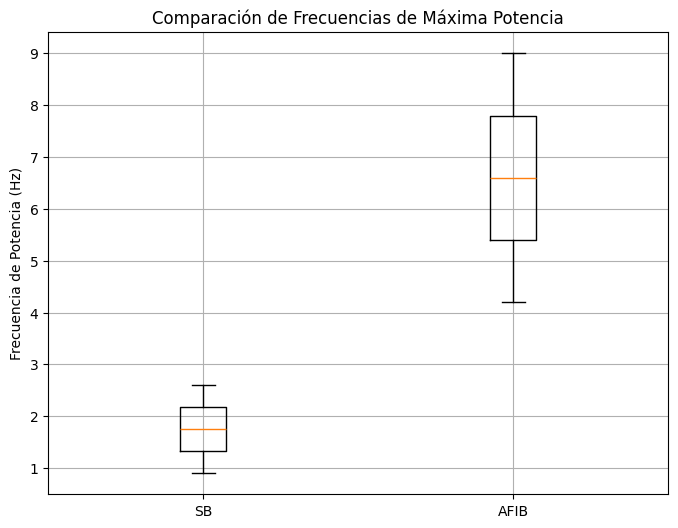

Prueba Mann-Whitney: Estadístico U = 0.0000, p-valor = 0.3333
No se rechaza la hipótesis nula (sin diferencias significativas con prueba de Mann-Whitney).


In [898]:
# Lista para almacenar las frecuencias de máxima potencia
frequencies = []

# Iterar sobre los registros seleccionados y calcular fMP
for index, row in df_filtrado_seleccion.iterrows():
    registro = row['Registro']
    estado = row['Estado']
    
    # Verificar si el registro está en ecg_dict
    if registro in ecg_dict:
        signal = ecg_dict[registro]  # Obtener la señal del diccionario
        
        # Procesar la señal
        processed_signal = process_signal(signal)
        
        # Calcular la frecuencia de máxima potencia
        fMP = calculate_max_pot(processed_signal)
        
        # Almacenar el resultado en la lista
        frequencies.append({'Estado': estado, 'fMP': fMP})
    else:
        print(f"Registro {registro} no encontrado en ecg_dict.")

# Convertir la lista de frecuencias a un DataFrame
freq_df = pd.DataFrame(frequencies)

# Verificar si hay datos para graficar
if not freq_df.empty:
    # Gráfico de Bigotes
    plt.figure(figsize=(8, 6))
    plt.boxplot([freq_df[freq_df['Estado'] == 'SB']['fMP'].dropna(), 
                  freq_df[freq_df['Estado'] == 'AFIB']['fMP'].dropna()], 
                 labels=['SB', 'AFIB'])
    
    plt.title('Comparación de Frecuencias de Máxima Potencia')
    plt.ylabel('Frecuencia de Potencia (Hz)')
    plt.grid(True)
    plt.show()

    # Filtrar las frecuencias de máxima potencia para cada grupo
    sb_data = freq_df[freq_df['Estado'] == 'SB']['fMP'].dropna()
    afib_data = freq_df[freq_df['Estado'] == 'AFIB']['fMP'].dropna()

    # Realizar las pruebas estadísticas
    t_stat, p_value_t = ttest_ind(sb_data, afib_data, equal_var=False)  # Prueba t
    u_stat, p_value_mwu = mannwhitneyu(sb_data, afib_data, alternative='two-sided')  # Prueba Mann-Whitney

    # Imprimir resultados de las pruebas
    print(f'Prueba Mann-Whitney: Estadístico U = {u_stat:.4f}, p-valor = {p_value_mwu:.4f}')

    # Determinar diferencias significativas
    alpha = 0.05

    if p_value_mwu < alpha:
        print("Se rechaza la hipótesis nula (diferencias significativas con prueba de Mann-Whitney).")
    else:
        print("No se rechaza la hipótesis nula (sin diferencias significativas con prueba de Mann-Whitney).")

else:
    print("No hay datos para graficar.")


/var/folders/11/9sh1kxmj38570z2lx7xfscbc0000gn/T/ipykernel_9819/669328379.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([freq_df[freq_df['Estado'] == 'SB']['sFSB'].dropna(),


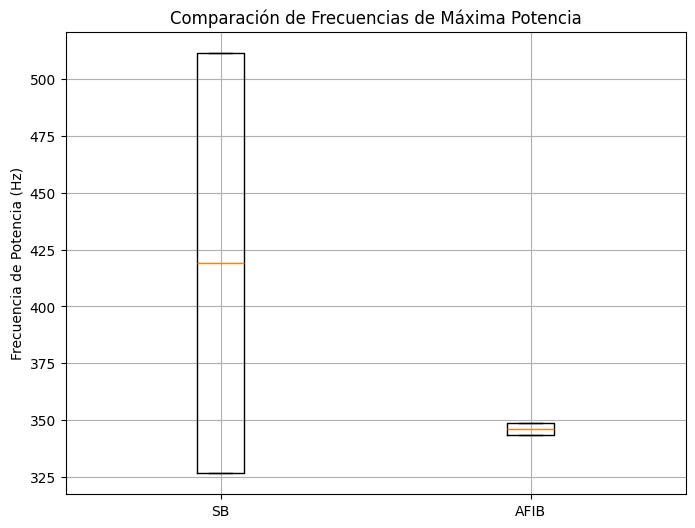

Prueba Mann-Whitney: Estadístico U = 32.0000, p-valor = 1.0000
No se rechaza la hipótesis nula (sin diferencias significativas con prueba de Mann-Whitney).


In [903]:
fsbs = []

for index, row in df_filtrado_seleccion.iterrows():
    registro = row['Registro']
    estado = row['Estado']
    
    if registro in ecg_dict:
        signal = ecg_dict[registro]  # Obtener la señal del diccionario
        
        # Procesar la señal
        processed_signal = process_signal(signal)
        # Calcular la frecuencia de máxima potencia
        _,_,sFSB = calc_bis_bic(processed_signal, 100, 500)
        # Almacenar el resultado en la lista
        frequencies.append({'Estado': estado, 'sFSB': sFSB})
    else:
        print(f"Registro {registro} no encontrado en ecg_dict.")

# Convertir la lista de frecuencias a un DataFrame
freq_df = pd.DataFrame(frequencies)

if not freq_df.empty:
    # Gráfico de Bigotes
    plt.figure(figsize=(8, 6))
    plt.boxplot([freq_df[freq_df['Estado'] == 'SB']['sFSB'].dropna(), 
                  freq_df[freq_df['Estado'] == 'AFIB']['sFSB'].dropna()], 
                 labels=['SB', 'AFIB'])
    
    plt.title('Comparación de Frecuencias de Máxima Potencia')
    plt.ylabel('Frecuencia de Potencia (Hz)')
    plt.grid(True)
    plt.show()

    sb_data = freq_df[freq_df['Estado'] == 'SB']['sFSB'].dropna()
    afib_data = freq_df[freq_df['Estado'] == 'AFIB']['sFSB'].dropna()

    # Realizar las pruebas estadísticas
    t_stat, p_value_t = stats.ttest_ind(sb_data, afib_data, equal_var=False)  # Prueba t
    u_stat, p_value_mwu = stats.mannwhitneyu(sb_data, afib_data, alternative='two-sided')  # Prueba Mann-Whitney

    # Imprimir resultados de las pruebas
    print(f'Prueba Mann-Whitney: Estadístico U = {u_stat:.4f}, p-valor = {p_value_mwu:.4f}')

    # Determinar diferencias significativas
    alpha = 0.05

    if p_value_mwu < alpha:
        print("Se rechaza la hipótesis nula (diferencias significativas con prueba de Mann-Whitney).")
    else:
        print("No se rechaza la hipótesis nula (sin diferencias significativas con prueba de Mann-Whitney).")

else:
    print("No hay datos para graficar.")

# ANALISIS 

Normalidad: En todos los registros (tanto SB como AFIB), las señales no siguen una distribución normal. 

Homocedasticidad: La prueba de homocedasticidad también indica que hay diferencias significativas en la varianza entre los dos grupos de señales (SB y AFIB). Esto sugiere que las variaciones en las amplitudes de las señales de ECG son diferentes entre los grupos, lo cual puede ser importante para el análisis y la interpretación de los resultados.

Por lo tanto se realizan pruebas no parametricas 



El p-valor asociado es 0.2677 de la FPM y p-valor = 1.0000 para la frecuencia del biespectro dado que son  mayor que el nivel de significancia (α = 0.05), no se rechaza la hipótesis nula. Esto sugiere que no hay diferencias significativas en las frecuencias de máxima potencia (fMP) y FB entre las poblaciones de SB y AFIB. Mientras que en el estadístico U es 0.000 y el p-valor es 0.3333. el p-valor es mayor que 0.05, lo que indica que no hay diferencias significativas en la distribución de las frecuencias de máxima potencia entre los dos grupos.

#### Grafico de Bigotes 
El gráfico de bigotes (boxplot) muestra la distribución de los datos para las frecuencias de máxima potencia (fMP) y frecuencia bioespectro entre las dos condiciones (SB y AFIB). Se observa que el gráfico de SB está más bajo que el de AFIB en FMP , mientras que en la frecuencia de bioespectros pasa ki contrario. AFIB esta al mismo nivel de SB.

1. Interpretación de la Posición de los Bigotes:
Mediana: La línea dentro de cada caja representa la mediana de los datos.El grupo AFIB mas alto sugiere que, en promedio, las frecuencias de máxima potencia son más altas en este grupo. 
La longitud de la caja (IQR) muestra la dispersión de los datos. el más amplio, indica que el grupo AIBF en la frecuencia  tiene mayor variabilidad en las frecuencias de máxima potencia de este grupo.
2. Análisis de la Distribución:
Comparación Visual:  se observa que pueden haber diferencias estadísticamente significativas.


### Analisis Estadistico Descriptivo

Existen diferencias en la Media, La media de las frecuencias de máxima potencia en el grupo AFIB (6.60 Hz) es significativamente más alta que en el grupo SB (1.75 Hz). Esto indica que, en promedio, los pacientes con AFIB tienen frecuencias de máxima potencia más altas en comparación con aquellos con SB.

 La desviación estándar en el grupo AFIB (3.39 Hz) es considerablemente mayor que en el grupo SB (1.20 Hz). Esto sugiere que las frecuencias de máxima potencia en el grupo AFIB son más variadas.

El rango de las frecuencias de máxima potencia también es notablemente diferente. Mientras que en SB el rango va de 0.90 Hz a 2.60 Hz, en AFIB el rango es de 4.20 Hz a 9.00 Hz. Esto muestra que los pacientes con AFIB tienen un rango de frecuencias mucho más amplio.